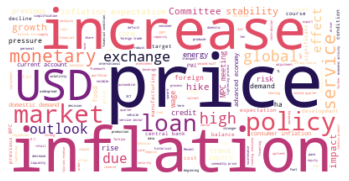

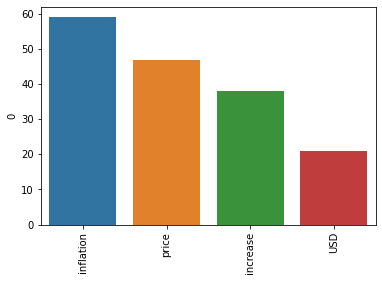

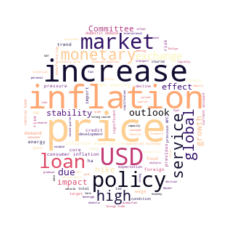

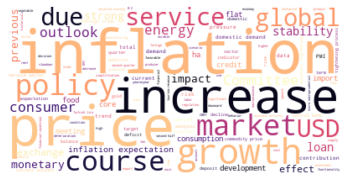

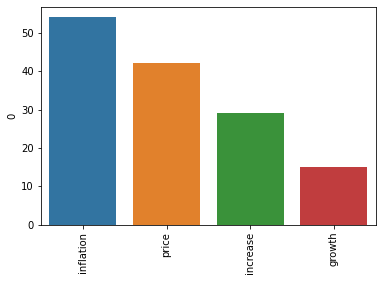

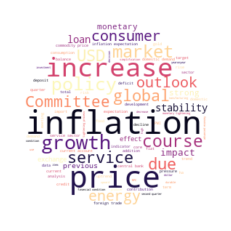

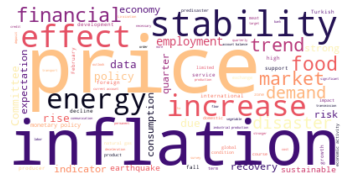

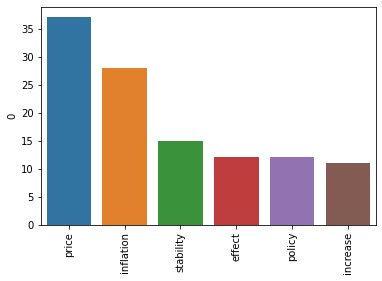

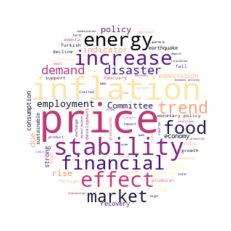

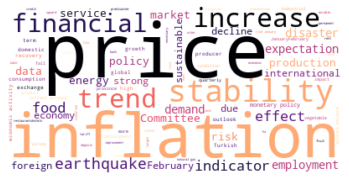

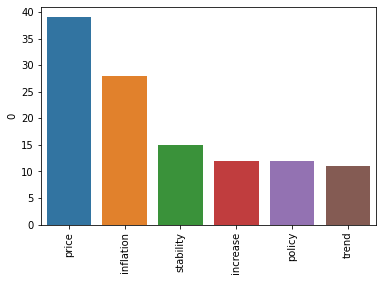

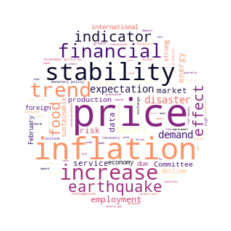

In [32]:
import nltk
import requests
from bs4 import BeautifulSoup
import re
from string import digits
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import numpy as np
from PIL import Image
from io import BytesIO



#erkan_2_meeting
url_erkan_2 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-29"
#erkan_1_meeting
url_erkan_1 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-24"
#kavcioglu_26.meeting
url_kavcioglu_26 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-21"
#kavcioglu_25.meeting
url_kavcioglu_25 = "https://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Announcements/Press+Releases/2023/ANO2023-19"


url_list=[url_erkan_2,url_erkan_1,url_kavcioglu_26,url_kavcioglu_25]
class MeetingSummaryAnalysis:
    def __init__(self, url, stop_words,n):
        self.url = url
        self.stop_words = stop_words
        self.summary = self.get_cbrt_meeting_summary()
        self.summary_merged = self.clean_and_merge_paragraphs()
        self.lemmatized_output = self.lemmatize_text()
        self.tagged_data = self.tokenize_and_tagged_text()
        self.n=n

    def get_cbrt_meeting_summary(self):
        """
        Fetches the meeting summary from the given URL using web scraping.

        Returns:
            list: A list of paragraphs containing the meeting summary.
        """
        page = requests.get(self.url)
        soup = BeautifulSoup(page.content, "html.parser")
        summary=soup.find_all("p", dir="ltr")
        return summary

    def clean_and_merge_paragraphs(self):
        """
        Cleans and merges the paragraphs in the input list.

        Returns:
            list: A list of cleaned and merged paragraphs.
        """
        summary_merged = []
        for i in self.summary:
            i = i.text.replace("\xa0", "")
            summary_merged.append(i)
        return summary_merged

    def remove_digits(self, input_text):
        remove_digits = str.maketrans('', '', digits)
        res = str(input_text).translate(remove_digits)
        res2 = re.sub(r'[^\w\s]', '', res)
        return res2

    def lemmatize_text(self):
        lemmatizer = WordNetLemmatizer()
        word_list = nltk.word_tokenize(self.remove_digits(" ".join(self.summary_merged)))
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        return lemmatized_output

    def tokenize_and_tagged_text(self):
        tokens = nltk.word_tokenize(self.lemmatized_output)
        tagged = nltk.pos_tag(tokens)
        tagged = pd.DataFrame(tagged)
        tagged = tagged[tagged[1].str.startswith("JJ") | tagged[1].str.startswith("N")]
        return tagged

    def generate_word_cloud(self):
        nouns_and_adjectives = self.tagged_data[self.tagged_data[1].str.startswith("JJ") | self.tagged_data[1].str.startswith("N")]
        text_for_word_cloud = " ".join(nouns_and_adjectives[0])
        plt.axis("off")
        plt.imshow(WordCloud(background_color="white", stopwords=self.stop_words, colormap="magma").generate(text_for_word_cloud), interpolation="bilinear")
        plt.show()

    def generate_frequency_bar_plot(self, n):
        df = pd.DataFrame(self.tagged_data[0].value_counts()).head(n)
        df = df[df.index.isin(list(self.stop_words)) == False].head(n)
        my_plot = sns.barplot(data=df, x=df.index, y=0)
        my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
        plt.show()

    def generate_masked_word_cloud(self):
        x, y = np.ogrid[:300, :300]
        mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
        mask = 255 * mask.astype(int)

        nouns_and_adjectives = self.tagged_data[self.tagged_data[1].str.startswith("JJ") | self.tagged_data[1].str.startswith("N")]
        text_for_word_cloud = " ".join(nouns_and_adjectives[0])

        plt.axis("off")
        plt.imshow(WordCloud(background_color="white", stopwords=self.stop_words, width=300, height=300, colormap="magma", mask=mask).generate(text_for_word_cloud), interpolation="bilinear")
        plt.show()
    def save_png(self):
        pass



if __name__ == "__main__":
    stop_words = {"year", "rate", "last", "June", "point", "wa", "basis", "index",
                  "May", "period", "level", "July", "annual", "good", "monthly",
                  "average", "month", "group", "subgroup", "first", "April", "March","other"}

    
for i in url_list:
    meeting_summary_analysis = MeetingSummaryAnalysis(i, stop_words,n=5)
    meeting_summary_analysis.clean_and_merge_paragraphs
    meeting_summary_analysis.remove_digits(summary_merged)
    meeting_summary_analysis.lemmatize_text()
    meeting_summary_analysis.tokenize_and_tagged_text()
    meeting_summary_analysis.generate_word_cloud()
    meeting_summary_analysis.generate_frequency_bar_plot(n=10)
    meeting_summary_analysis.generate_masked_word_cloud()
